# Bokanalyse med plotting

I denne oppgaven skal du analysere boken *Alice in Wonderland* og se hvor mange ganger forskjellige ord dukker opp i de forskjellige kapitlene. Dette skal vi etterhvert plotte inn i en graf ved hjelp av `matplotlib`.

Filen vi skal bruke er [alice_in_wonderland.txt](../data/alice_in_wonderland.txt), som er hele den engelske versjonen av Alice i eventyrland i en tekstfil.

## Ordhyppighetsanalyse

Ordhyppighetsanalyse handler om å identifisere og telle hvor ofte hvert ord forekommer i en tekst. Dette kan gi innsikt i hvilke ord som er mest sentrale eller viktige i teksten. Her er noen viktige aspekter ved ordhyppighetsanalyse:

- Identifisere Nøkkelord:

Ved å finne de mest brukte ordene, kan man identifisere nøkkeltemaer og konsepter som er viktige i teksten.

- Tekstanalyse:

Ordhyppighetsanalyse er en grunnleggende teknikk innen tekstanalyse og kan brukes som et første skritt i mer avanserte analyser som sentimentanalyse, emneanalyse, og stilistisk analyse.
Sammenligning av Tekster:

Ved å sammenligne ordhyppigheten i forskjellige tekster, kan man finne likheter og forskjeller i temaer, stil og ordbruk.

- Språklig Mønster:

Analysen kan avsløre språklige mønstre og vaner hos forfatteren, som bruk av spesifikke ord eller fraser.

- Dataforberedelse:

Før analysen må teksten ofte renses for spesialtegn, tall og stoppeord (vanlige ord som "og", "er", "i", etc.) som ikke gir mye innsikt.

- Visualisering:

Resultatene av ordhyppighetsanalysen kan visualiseres ved hjelp av grafer, diagrammer eller ordskyer for å gjøre det lettere å forstå og tolke dataene.

### Oppgave a) 
Skriv et program i Python som viser de mest brukte ordene i "Alice i Eventyrland". Visualiser deretter ordene i en graf (bruk matplotlib)

(['the', 'and', 'to', 'a', 'it'], [1644, 872, 729, 632, 595])


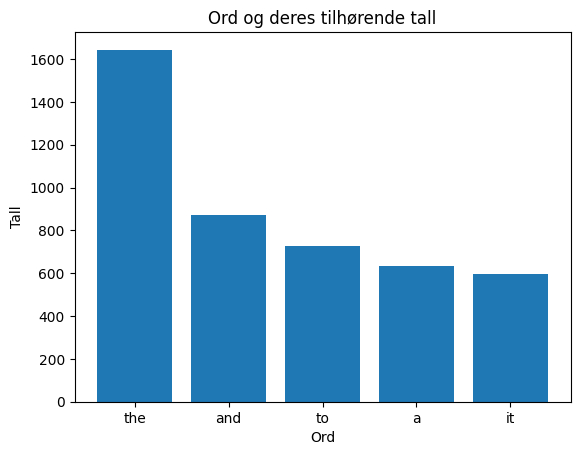

In [50]:
# Skriv din kode her...

def fjern_spesialtegn(filename):

    with open(filename,'r') as f:
        innhold = f.read()

        tekst_strippet = ''

        for bokstav in innhold:

            if bokstav.isalpha() == True:
                tekst_strippet += bokstav.lower()

            elif bokstav.islower() == True:
                tekst_strippet += bokstav

            else:
                tekst_strippet += ' '

#vet at tegnet ' blir bruk i ord som Alice's, da blir det med i tellingen for antall ganger ordet 'alice' står. Videre så blir da s et eget ord.
        
    return tekst_strippet

#print(fjern_spesialtegn('alice_in_wonderland.txt'))

def telle_ord(filename):

    innhold = fjern_spesialtegn('alice_in_wonderland.txt')
    ord_lst = innhold.split()
    
    x_lst = []
    y_lst = []

    for ord in ord_lst:
        
        if ord in x_lst:
            indeks = int(x_lst.index(ord))
            y_lst[indeks] += 1

        else:
            x_lst.append(ord)
            y_lst.append(1)


    return x_lst, y_lst

#print(telle_ord('alice_in_wonderland.txt'))

#finner de 5 ordene som står flest ganger. Tar ikke hensyn til om noen ord står like mange ganger. 

def stigende_rekkefølge(filename):

    x,y = telle_ord('alice_in_wonderland.txt')
    x_verdier = []
    y_verdier = []

    for i in range(5):

        teller = 0
        max = y[0]
        indeks_max = 0

        for tall in y:
            
            if tall > max:
                max = tall
                indeks_max = teller

            teller += 1

        x_verdier.append(x[indeks_max])
        y_verdier.append(y[indeks_max])

        y.pop(indeks_max)
        x.pop(indeks_max)

    return x_verdier,y_verdier

print(stigende_rekkefølge('alice_in_wonderland.txt'))


import matplotlib.pyplot as plt

x_verdi,y_verdi = stigende_rekkefølge('alice_in_wonderland.txt')
plt.bar(x_verdi,y_verdi)
plt.xlabel("Ord")                         # X-akse tittel
plt.ylabel("Tall")                        # Y-akse tittel
plt.title("Ord og deres tilhørende tall")
plt.show()


        








#ikke en del av en oppgave. Måtte bare huske hvordan man åpner en fil
def read_file(filename):

    with open(filename,'r') as f:
        innhold = f.read()

    return innhold

#print(read_file('alice_in_wonderland.txt'))




**Obs:** funksjonen `count` tar hensyn til store og små bokstaver, så dette må du gjøre noe med i koden din.

## Karakteranalyse:

Karakteranalyse handler om å undersøke og forstå karakterene i en tekst, inkludert deres egenskaper, handlinger, og relasjoner til andre karakterer.

### Oppgave b)
Hvor ofte dukker forskjellige karakterer opp?

Følg disse trinnene for å løse oppgaven:

- Les inn teksten fra en fil.
- Rens teksten ved å fjerne spesialtegn og tall
    ```Python 
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    ```
- Identifiser karakterene: Lag en liste over karakterene i boken.
    ```Python
    characters = ['Alice', 'Hare', 'Queen', 'King', 'Cat', 'Duchess', 'Hatter', 'Rabbit']
    ```

- Tell forekomsten av hver karakter.
- Visualiser resultatet

In [51]:
# Skriv din kode her...

## Leksikalsk mangfold

Leksikalsk mangfold refererer til variasjonen og rikdommen i ordforrådet som brukes i en tekst. Det måler hvor mange forskjellige ord (unikke ord) som brukes i forhold til det totale antallet ord i teksten. Høy leksikalsk mangfold indikerer at forfatteren bruker et bredt spekter av ord, noe som kan tyde på et rikt og variert språk.

Her er noen viktige aspekter ved leksikalsk mangfold:

- Type-Token Ratio (TTR):

    - Definisjon: Forholdet mellom antall unike ord (typer) og totalt antall ord (tokens) i en tekst.
    - Formel: TTR = (Antall unike ord) / (Totalt antall ord)
    - Formål: En høy TTR indikerer høy leksikalsk mangfold, mens en lav TTR indikerer lav leksikalsk mangfold.
    
- Leksikalsk Tetthet:

    - Definisjon: Forholdet mellom antall innholdsord (substantiv, verb, adjektiv, adverb) og totalt antall ord i en tekst.
    - Formål: Måler hvor "tett" teksten er med meningsbærende ord.

- Ordrikdom:

    - Definisjon: Variasjonen i ordforrådet som brukes i en tekst.
    - Formål: Gir innsikt i forfatterens språklige ferdigheter og tekstens kompleksitet.

- Sammenligning med Andre Tekster:

    - Formål: Ved å sammenligne leksikalsk mangfold i forskjellige tekster, kan man få innsikt i forskjeller i stil, kompleksitet og språklig variasjon mellom forfattere eller verk fra forskjellige perioder.

### Oppgave c)

Bruk metoden Type-Token Ratio (TTR) og finn ut hva det leksikalske mangfoldet i boken er.

Her er en steg-for-steg tilnærming:

- Les inn teksten fra en fil.
- Rens teksten ved å fjerne spesialtegn og tall.
    ```Python
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    ```
- Del teksten inn i ord.
- Tell totalt antall ord og antall unike ord.
- Beregn Type-Token Ratio (TTR).



In [52]:
# Skriv din kode her...